In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
!pip install hvplot
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
data = pd.read_csv("lending_club_loan_two.csv.zip", compression='zip', low_memory=True)
data.head(15)

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

In [88]:
df = pd.DataFrame(data)
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [89]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [91]:
data['loan_status'].value_counts().hvplot.bar(
    title="Сбалансированность целевой переменной Loan Status", xlabel='Loan Status', ylabel='Count',
    width=500, height=350,
    renderer='colab'
)

:Bars   [loan_status]   (count)

In [92]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False,
    width=350, height=400, bins=50, alpha=0.4,
    title="Распределние Installment по Loan Status",
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False,
    width=350, height=400, bins=30, alpha=0.4,
    title="Распределние Loan Amount по Loan Status",
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [93]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350,
    title="Распределние Loan Status по Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350,
    title="Распределние Loan Status по Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [94]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [95]:
print(f"Уникальные значения GRADE: {data.grade.unique()}")
print(f"Уникальные значения SUB_GRADE unique: {data.sub_grade.unique()}")

Уникальные значения GRADE: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Уникальные значения SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7440\121092049.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


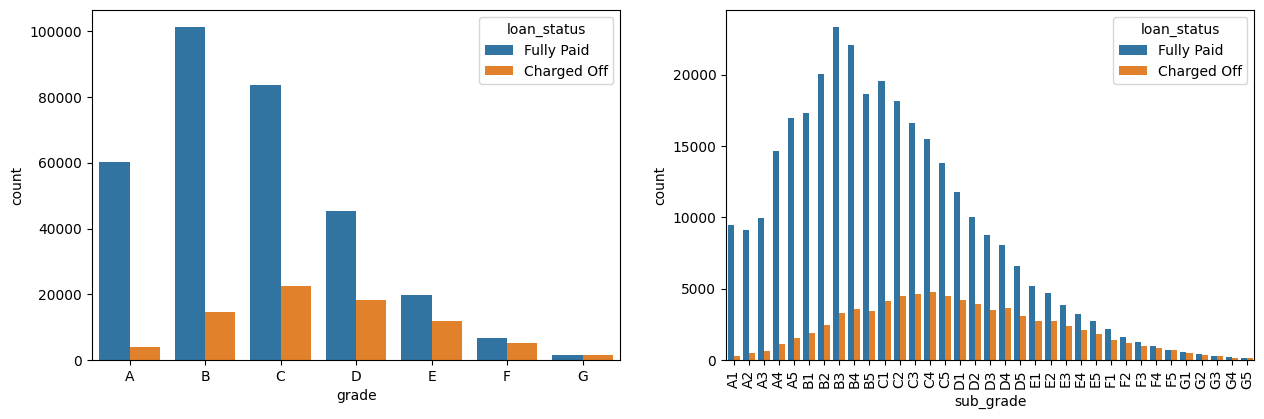

In [96]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='sub_grade', ylabel='count'>

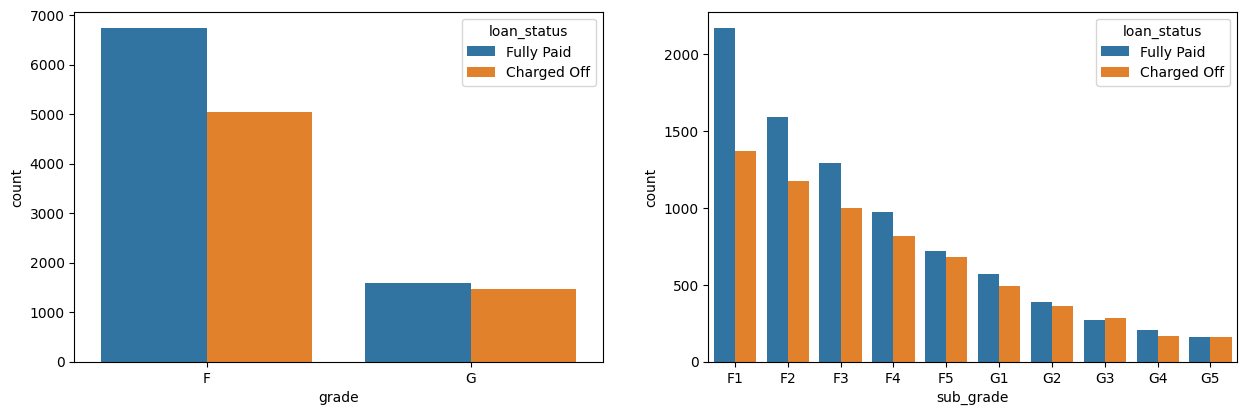

In [97]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [98]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [99]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7440\2424757870.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


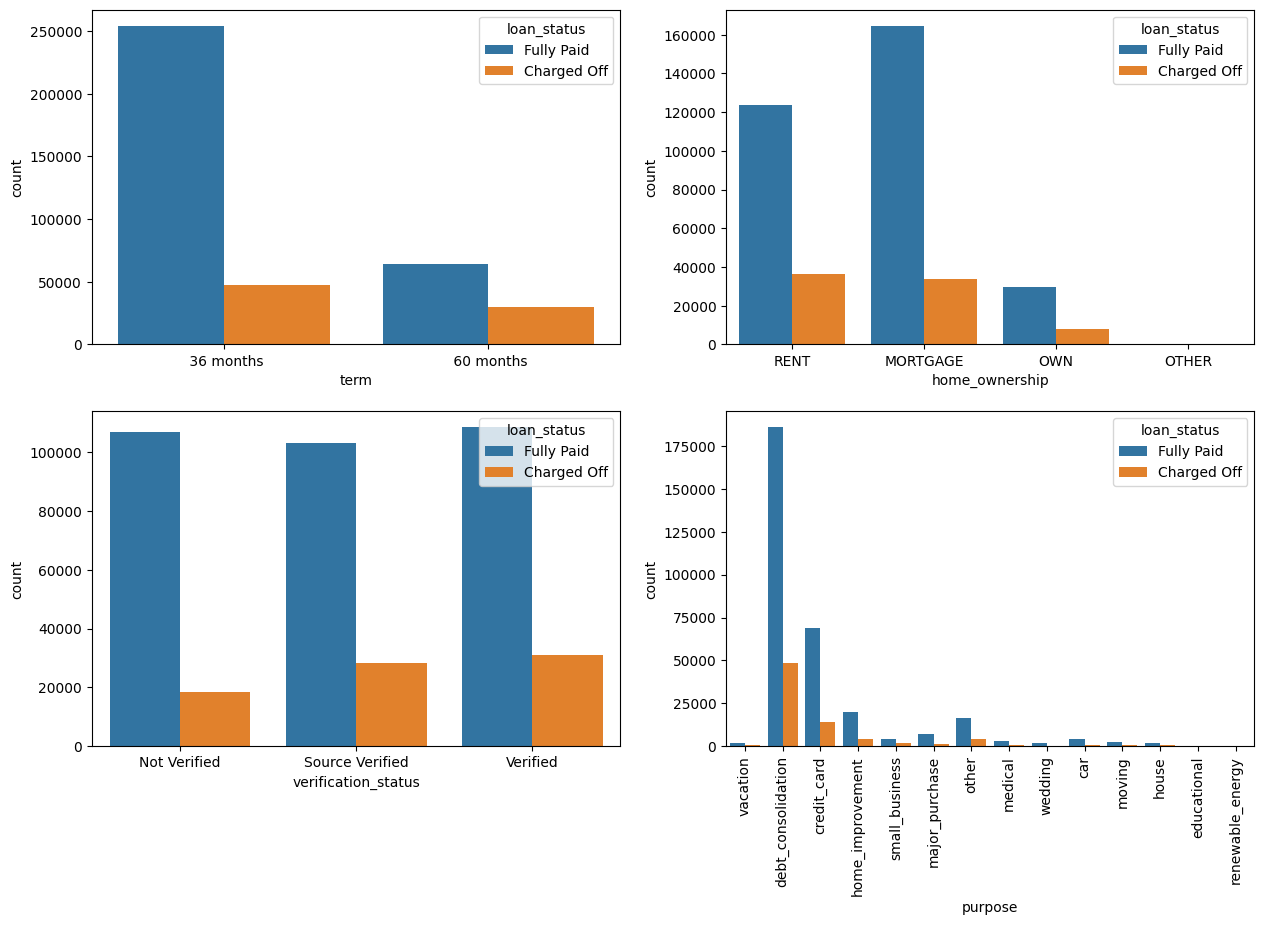

In [100]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [101]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

In [102]:
int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Распределние Loan Status по Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Распределние Loan Status по Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [103]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [104]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [105]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

In [106]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [107]:
data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7440\707488090.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


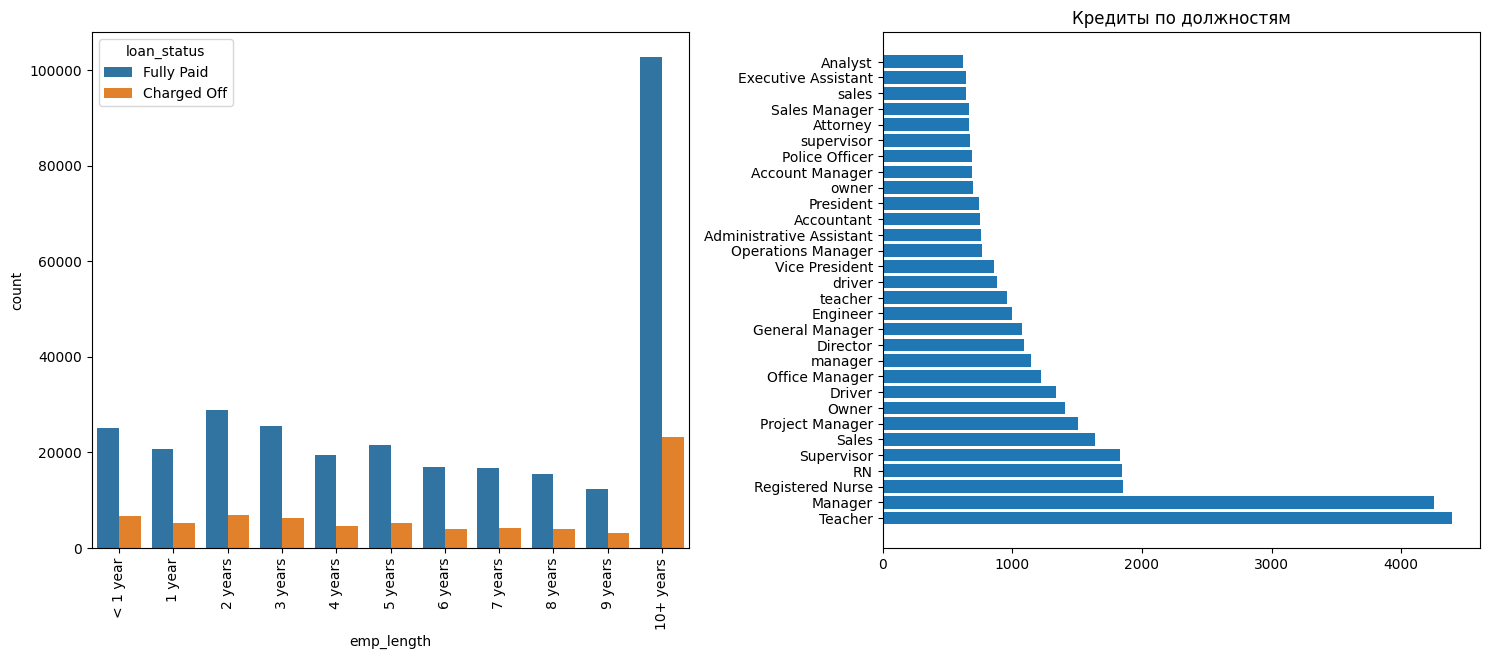

In [108]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("Кредиты по должностям")
plt.tight_layout()

In [109]:
data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [110]:
data['issue_d'].value_counts()

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64

In [111]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7440\836848778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_7440\836848778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [112]:
data.title.isna().sum()

1756

In [113]:
data['title'] = data.title.str.lower()

In [114]:
data.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

In [115]:
data.dti.value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [116]:
dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti Distribution", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [117]:
print(data[data['dti']>=40].shape)

(296, 27)


In [118]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     26
Charged Off     9
Name: count, dtype: int64

In [119]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [120]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [121]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [122]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,2014-04-01,Fully Paid,debt_consolidation,debt consolidation,14.67,1998-10-01,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\nVelasquezfort, TN 00813"


In [123]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [124]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     351
Charged Off     46
Name: count, dtype: int64

In [125]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [126]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

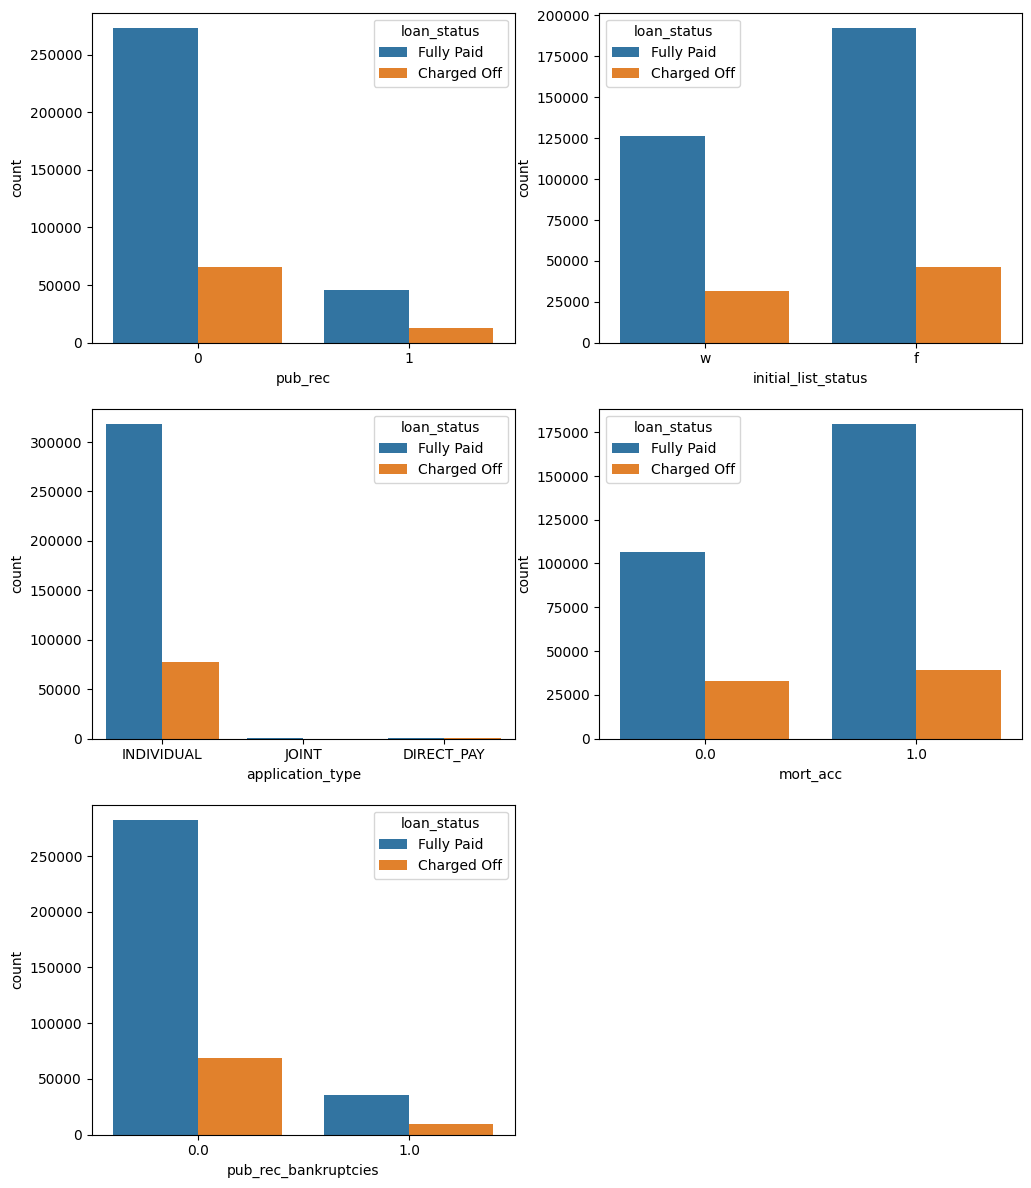

In [127]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [128]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [129]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}' / пропущенные значения составляют: '{missing}' ==> '{portion:.3f}%'")

'emp_title' / пропущенные значения составляют: '22927' ==> '5.789%'
'emp_length' / пропущенные значения составляют: '18301' ==> '4.621%'
'title' / пропущенные значения составляют: '1756' ==> '0.443%'
'revol_util' / пропущенные значения составляют: '276' ==> '0.070%'
'mort_acc' / пропущенные значения составляют: '37795' ==> '9.543%'
'pub_rec_bankruptcies' / пропущенные значения составляют: '535' ==> '0.135%'


In [130]:
data.emp_title.nunique()

173105

In [131]:
data.drop('emp_title', axis=1, inplace=True)

In [132]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [133]:
for year in data.emp_length.unique():
    print(f"{year}")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')


10+ years
loan_status
1   0.82
0   0.18
Name: proportion, dtype: float64
4 years
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
< 1 year
loan_status
1   0.79
0   0.21
Name: proportion, dtype: float64
6 years
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
9 years
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
2 years
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
3 years
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
8 years
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
7 years
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
5 years
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
1 year
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
nan
Series([], Name: proportion, dtype: float64)


In [134]:
data.drop('emp_length', axis=1, inplace=True)

In [135]:
data.title.value_counts().head()

title
debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: count, dtype: int64

In [136]:
data.purpose.value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

In [137]:
data.drop('title', axis=1, inplace=True)

In [138]:
data.mort_acc.value_counts()

mort_acc
1.00    218458
0.00    139777
Name: count, dtype: int64

In [139]:
data.mort_acc.isna().sum()

37795

In [140]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [141]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}'/ пропущенные значения составляют: '{missing}' ==> '{portion:.3f}%'")

'revol_util'/ пропущенные значения составляют: '276' ==> '0.070%'
'mort_acc'/ пропущенные значения составляют: '37795' ==> '9.543%'
'pub_rec_bankruptcies'/ пропущенные значения составляют: '535' ==> '0.135%'


In [142]:
data.dropna(inplace=True)

In [143]:
data.shape

(358014, 24)

In [144]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [145]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [146]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [147]:
data.term.unique()

array([36, 60], dtype=int64)

In [148]:
data.drop('grade', axis=1, inplace=True)

In [149]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [150]:
data.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [151]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [152]:
data.zip_code.value_counts()

zip_code
70466    51552
30723    51180
22690    51030
48052    50556
00813    41156
29597    40858
05113    40752
11650    10412
93700    10347
86630    10171
Name: count, dtype: int64

In [153]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [154]:
data.drop('address', axis=1, inplace=True)

In [155]:
data.drop('issue_d', axis=1, inplace=True)

In [156]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [157]:
data.earliest_cr_line.nunique()

65

In [158]:
data.earliest_cr_line.value_counts()

earliest_cr_line
2001    26565
2000    26210
2002    24001
1999    23634
2003    21893
        ...  
1954        3
1953        2
1950        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [159]:
data.drop('earliest_cr_line', axis=1, inplace=True)

In [78]:
print(f"Начальная размерность датафрейма: {data.shape}")

# Удаление повторяющихся признаков
data = data.T.drop_duplicates()
data = data.T

# Удаление повторяющихся строк
data.drop_duplicates(inplace=True)

print(f"Конечная размерность датафрейма: {data.shape}")

Начальная размерность датафрейма: (358014, 78)


KeyboardInterrupt: 

In [160]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.2013273223952136
Weight of negative values 0.7986726776047864


In [161]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(239869, 78)
(118145, 78)


In [162]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(239846, 78)
(239869, 78)


In [163]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(239869, 78)
(237365, 78)


In [164]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [165]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723       bool
zip_code_48052       bool
zip_code_70466       bool
zip_code_86630       bool
zip_code_93700       bool
Length: 77, dtype: object

In [166]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Результаты на тренировочной выборке:\n================================================")
        print(f"Accuracy: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Отчёт по классификации:\n{clf_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Результаты на тестовой выборке:\n================================================")
        print(f"Accuracy: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Отчёт по классификации:\n{clf_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(true, pred)}\n")

In [168]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [169]:
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [170]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3

sequential = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = sequential.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8420 - loss: 0.3388 - val_AUC: 0.9009 - val_loss: 0.2714
Epoch 2/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.8761 - loss: 0.2970 - val_AUC: 0.9034 - val_loss: 0.2701
Epoch 3/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.8815 - loss: 0.2905 - val_AUC: 0.9039 - val_loss: 0.2691
Epoch 4/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.8841 - loss: 0.2873 - val_AUC: 0.9044 - val_loss: 0.2736
Epoch 5/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8865 - loss: 0.2864 - val_AUC: 0.9053 - val_loss: 0.2755
Epoch 6/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8881 - loss: 0.2839 - val_AUC: 0.9047 - val_loss: 0.2744
Epoch 7/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8884 - loss: 0.2823 - val_AUC: 0.9051 - val_loss: 0.2665
Epoch 8/20
7418/7418 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8890 - loss: 0.2826 - val_AUC: 0.9051 - val_loss: 0.2745
Epoch 9/20
7418/7418 ━━━━━━━━━━━

In [172]:
y_train_pred = sequential.predict(X_train)
y_test_pred = sequential.predict(X_test)
print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

7418/7418 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Результаты на тренировочной выборке:
Accuracy: 88.59%
_______________________________________________
Отчёт по классификации:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.88      0.89       0.92          0.89
recall        0.46      0.99      0.89       0.72          0.89
f1-score      0.62      0.93      0.89       0.77          0.87
support   47762.00 189603.00      0.89  237365.00     237365.00
_______________________________________________
Матрица ошибок: 
 [[ 21759  26003]
 [  1080 188523]]

Результаты на тестовой выборке:
Accuracy: 88.54%
_______________________________________________
Отчёт по классификации:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.96     0.88      0.89       0.92          0.89
recall        0.46     0.99      0.89       0.73          0.89
f1-score      0.62     0.93      0.89       0.77        

In [173]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60, 
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Результаты на тренировочной выборке:
Accuracy: 89.47%
_______________________________________________
Отчёт по классификации:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.89       0.92          0.90
recall        0.51      0.99      0.89       0.75          0.89
f1-score      0.66      0.94      0.89       0.80          0.88
support   47762.00 189603.00      0.89  237365.00     237365.00
_______________________________________________
Матрица ошибок: 
 [[ 24264  23498]
 [  1500 188103]]

Результаты на тестовой выборке:
Accuracy: 88.64%
_______________________________________________
Отчёт по классификации:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.91     0.88      0.89       0.90          0.89
recall        0.49     0.99      0.89       0.74          0.89
f1-score      0.63     0.93      0.89       0.78          0.87
support   23945.00 94200.00      0.89  118145.00     118145.00
________________

In [174]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Результаты на тренировочной выборке:
Accuracy: 100.00%
_______________________________________________
Отчёт по классификации:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   47762.00 189603.00      1.00  237365.00     237365.00
_______________________________________________
Матрица ошибок: 
 [[ 47760      2]
 [     0 189603]]

Результаты на тестовой выборке:
Accuracy: 88.54%
_______________________________________________
Отчёт по классификации:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.95     0.88      0.89       0.92          0.89
recall        0.46     0.99      0.89       0.73          0.89
f1-score      0.62     0.93      0.89       0.78          0.87
support   23945.00 94200.00      0.89  118145.00     118145.00
_______________

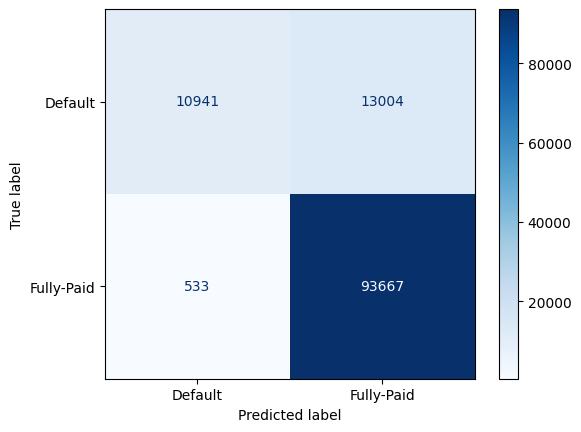

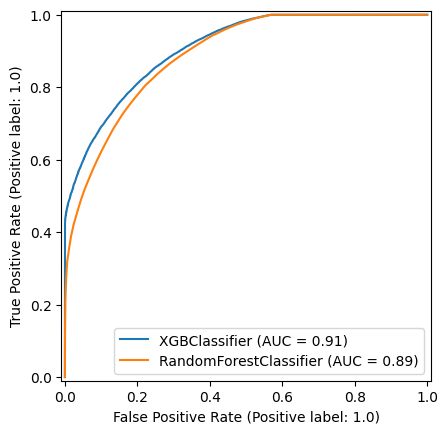

In [175]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [182]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Sequential': sequential
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.726
XGBOOST                        roc_auc_score: 0.737
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
SEQUENTIAL                     roc_auc_score: 0.903


In [180]:
sequential.save('model.h5')

import json

unique_values_data = data.drop(columns='loan_status', axis=1)

dict_unique = {key: unique_values_data[key].unique().tolist() for key in unique_values_data.columns}
with open("unique_values2.json", "w") as file:
  json.dump(dict_unique, file)